In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.shape

(768, 9)

# EDA and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.Outcome.value_counts(normalize = True)

Outcome
0   0.651
1   0.349
Name: proportion, dtype: float64

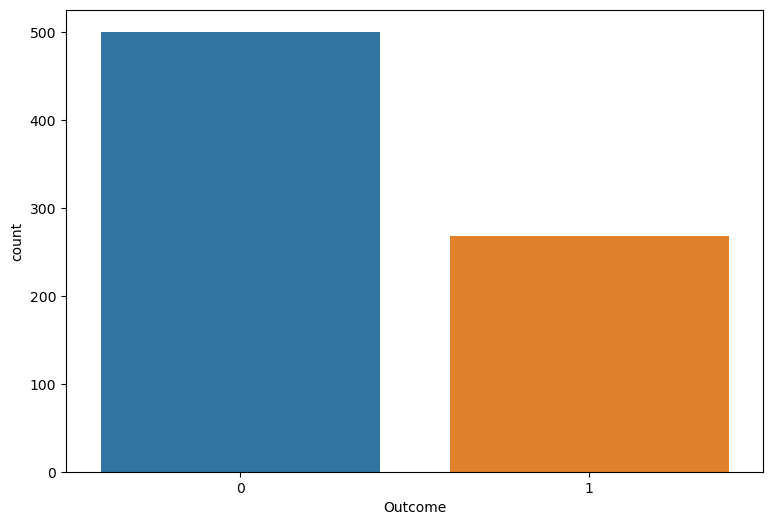

In [8]:
sns.countplot(data = df, x = "Outcome");

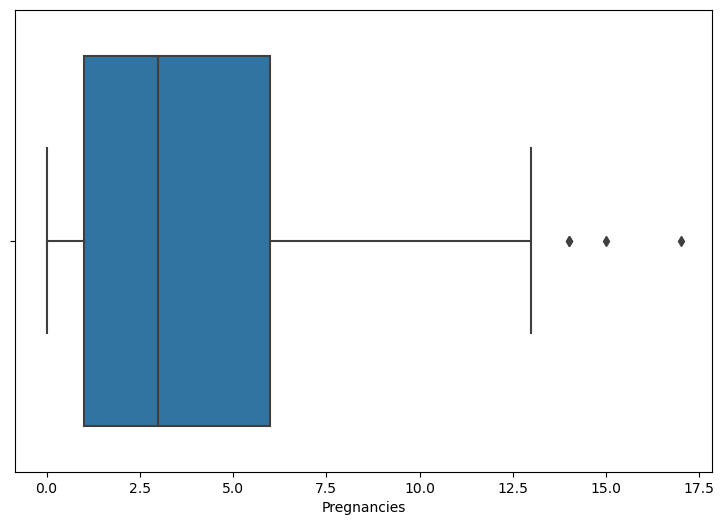

In [9]:
sns.boxplot(data =df, x="Pregnancies");

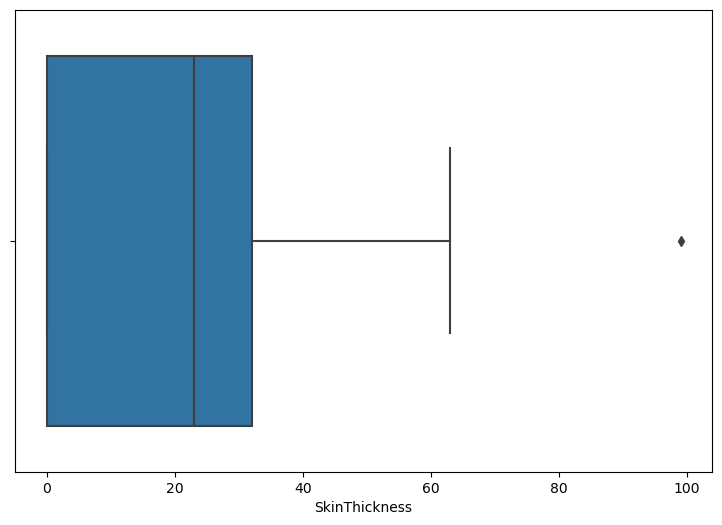

In [10]:
sns.boxplot(data =df, x="SkinThickness");

**Araştırmalara göre 80'in üzerinde bir değer olamaz, o yüzden 100 olanı dropluyoruz**

In [11]:
df = df[df.SkinThickness<70]

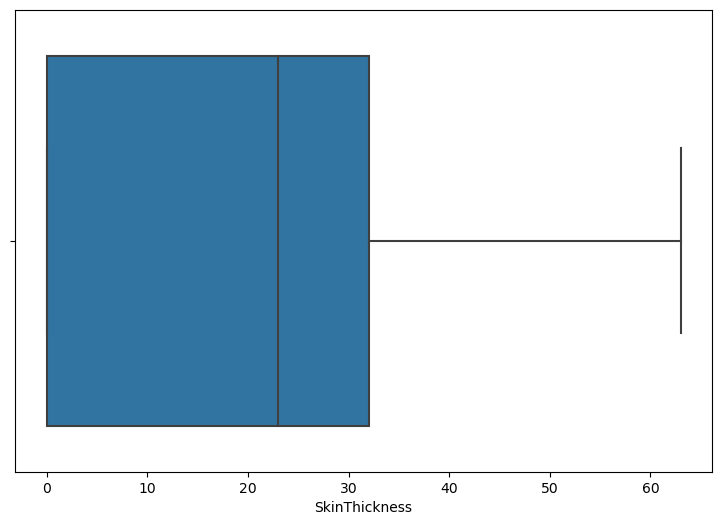

In [12]:
sns.boxplot(data =df, x="SkinThickness");

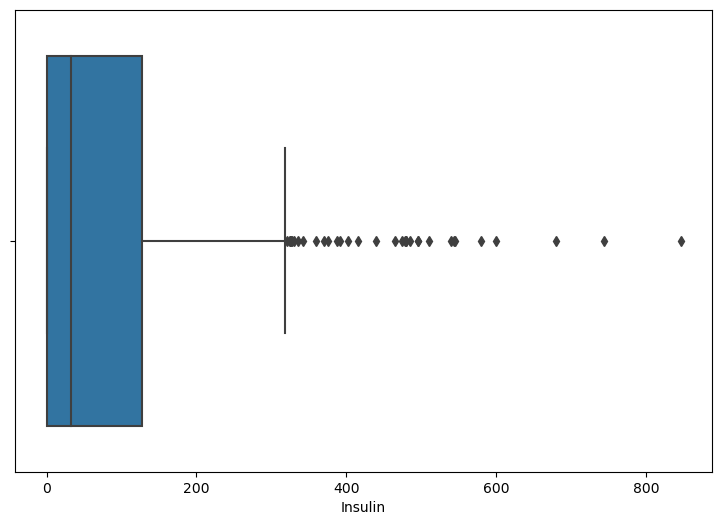

In [13]:
sns.boxplot(data =df, x="Insulin");

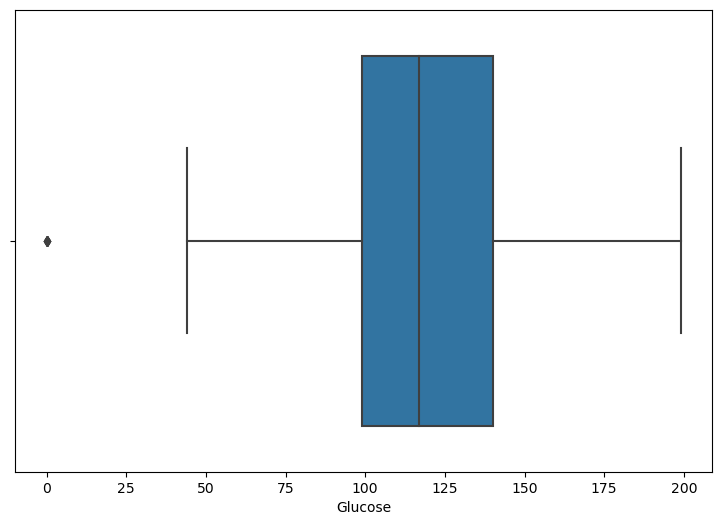

In [14]:
sns.boxplot(data =df, x="Glucose");

**Glukoz değeri 0 olamaz.**

In [15]:
df = df[df.Glucose>0]

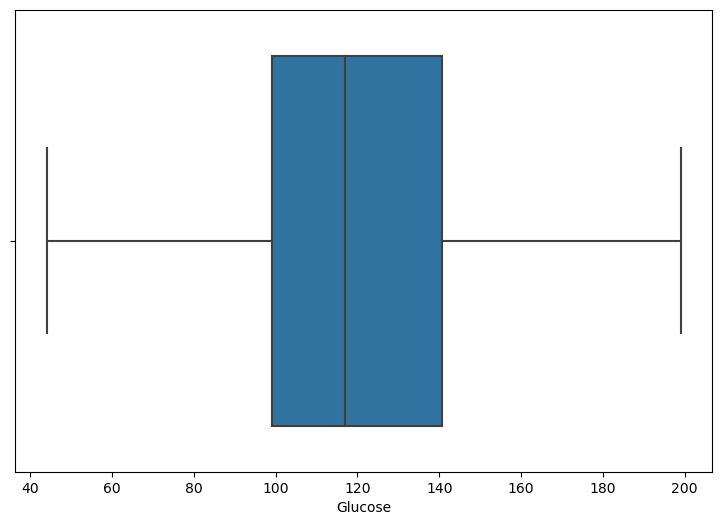

In [16]:
sns.boxplot(data =df, x="Glucose");

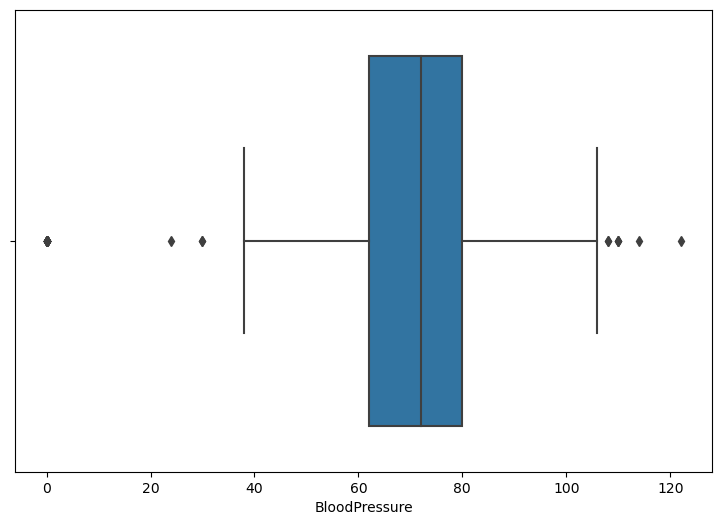

In [17]:
sns.boxplot(data =df, x="BloodPressure");

**Kan basıncı 35'in üstünde olması gerek.**

In [18]:
df = df[df.BloodPressure>35]

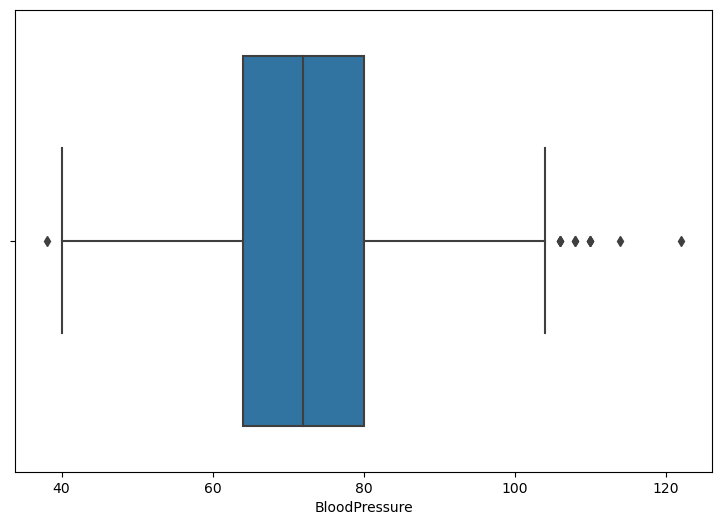

In [19]:
sns.boxplot(data =df, x="BloodPressure");

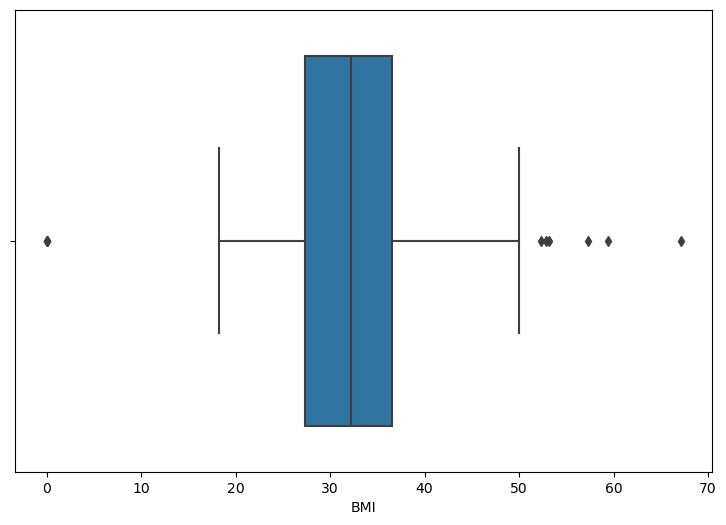

In [20]:
sns.boxplot(data =df, x="BMI");

**Vücut kitle indeksi 0 olamaz.**

In [21]:
df = df[df.BMI>0]

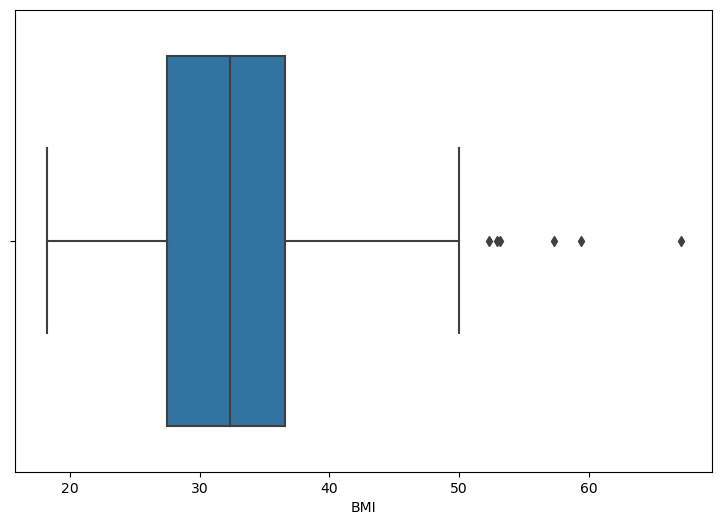

In [22]:
sns.boxplot(data =df, x="BMI");

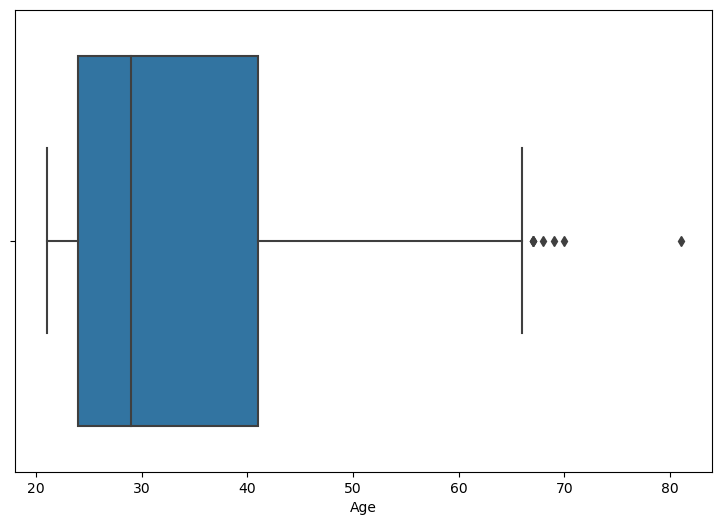

In [23]:
sns.boxplot(data =df, x="Age");

**Hamile kalmış en yaşlı kadın 74 yaşında.**

In [24]:
df = df[df.Age<74]

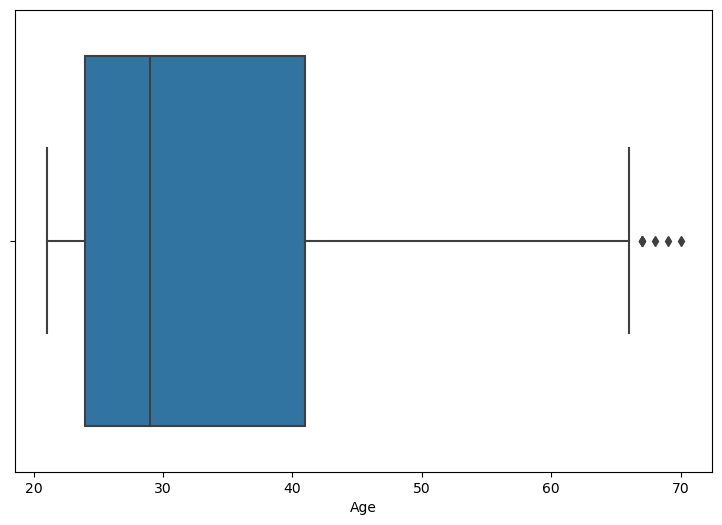

In [25]:
sns.boxplot(data =df, x="Age");

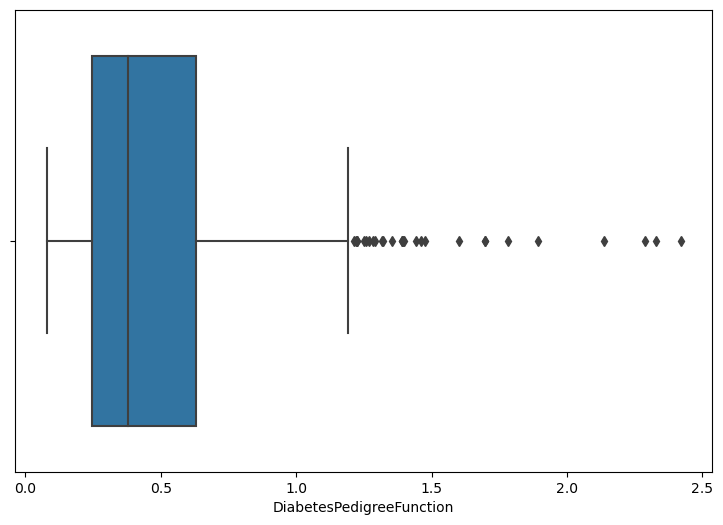

In [26]:
sns.boxplot(data =df, x="DiabetesPedigreeFunction");

In [27]:
df.shape

(719, 9)

In [28]:
df.Outcome.value_counts()

Outcome
0    472
1    247
Name: count, dtype: int64

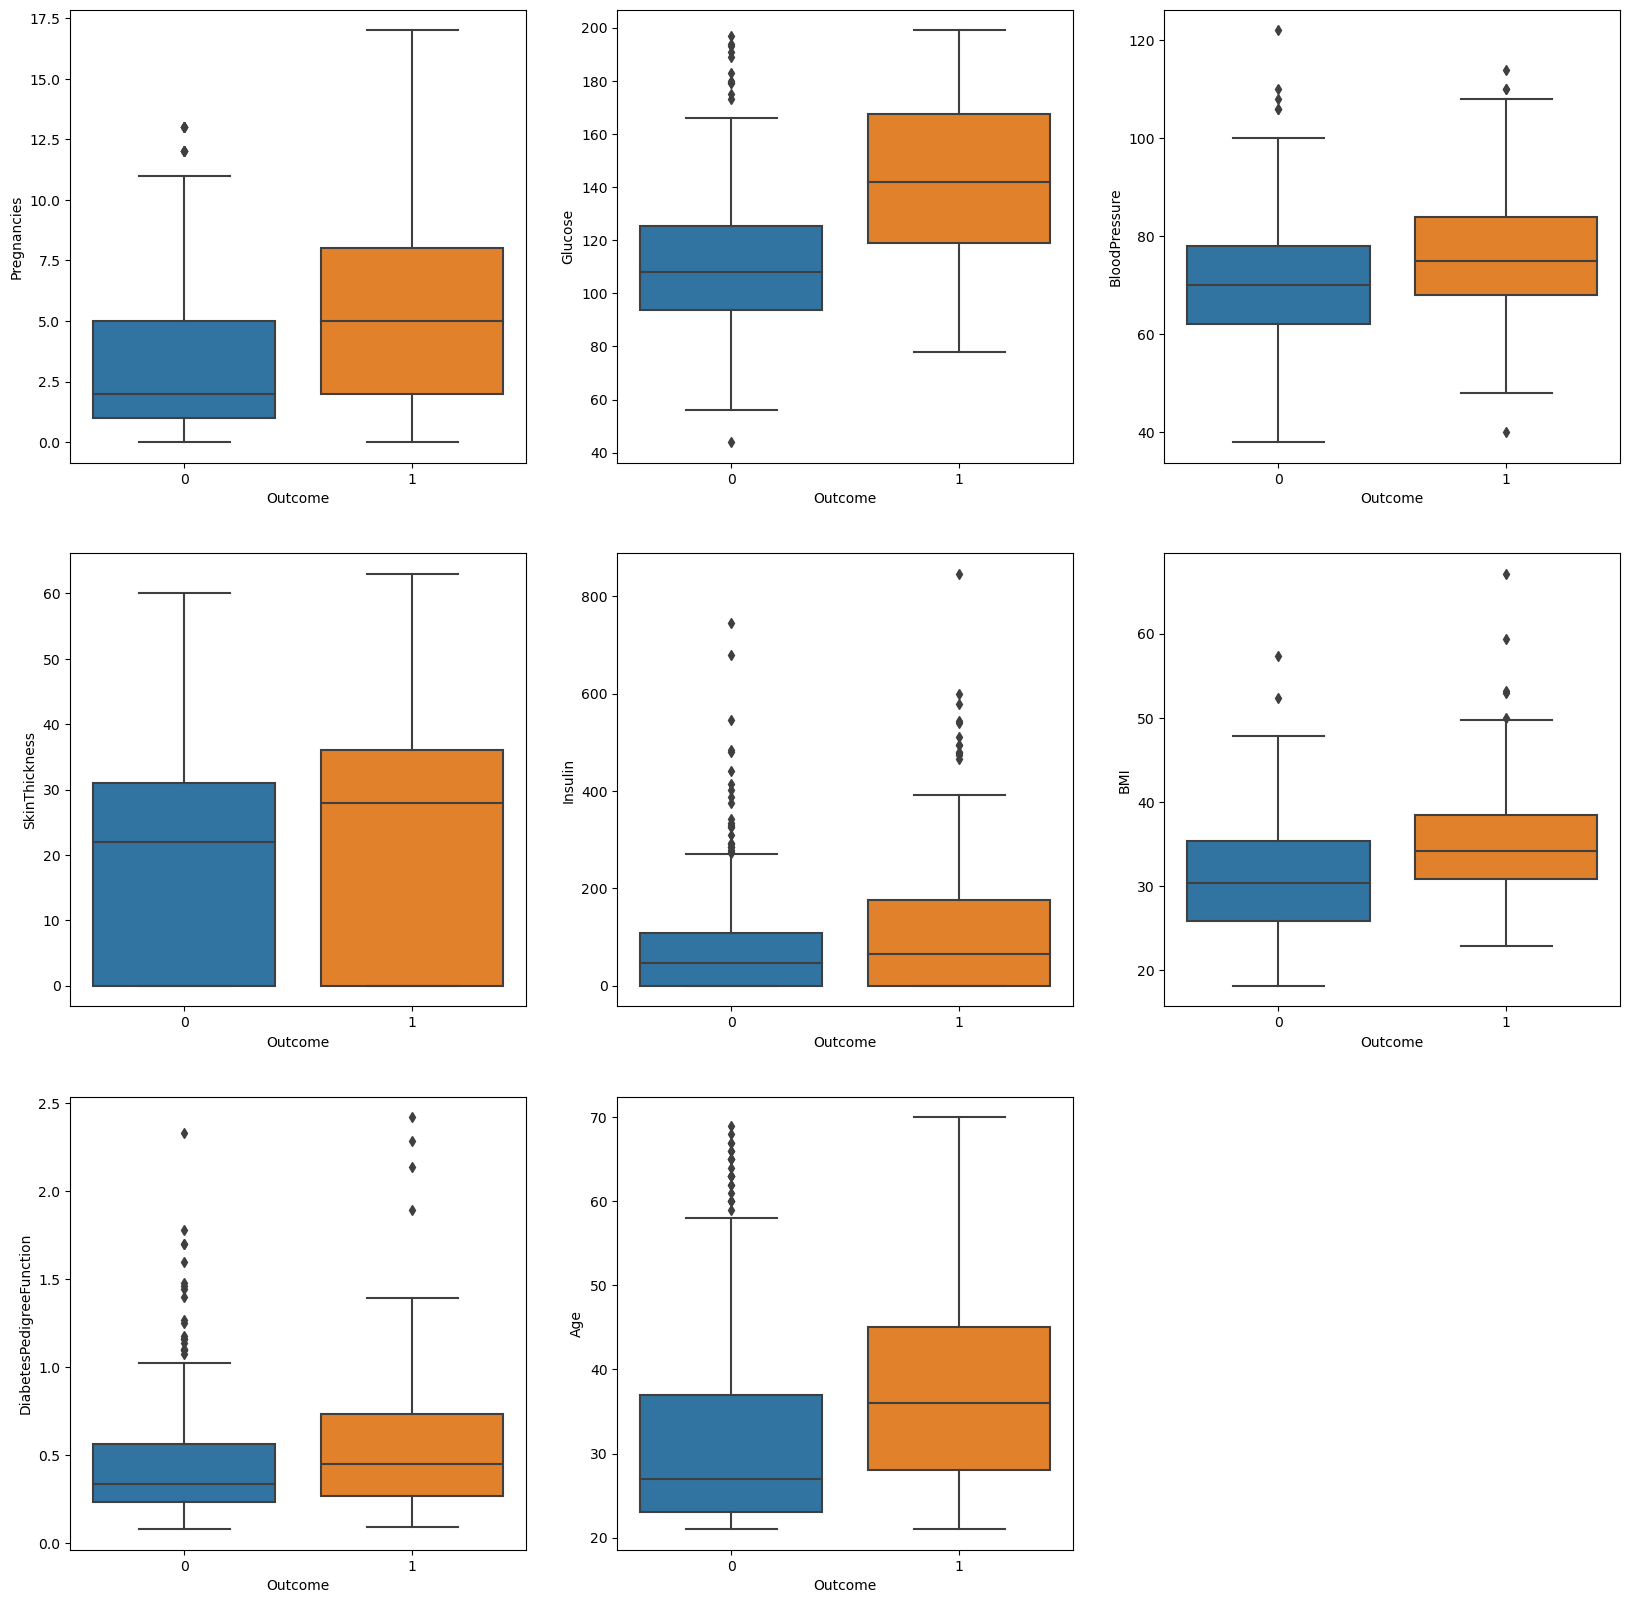

In [29]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

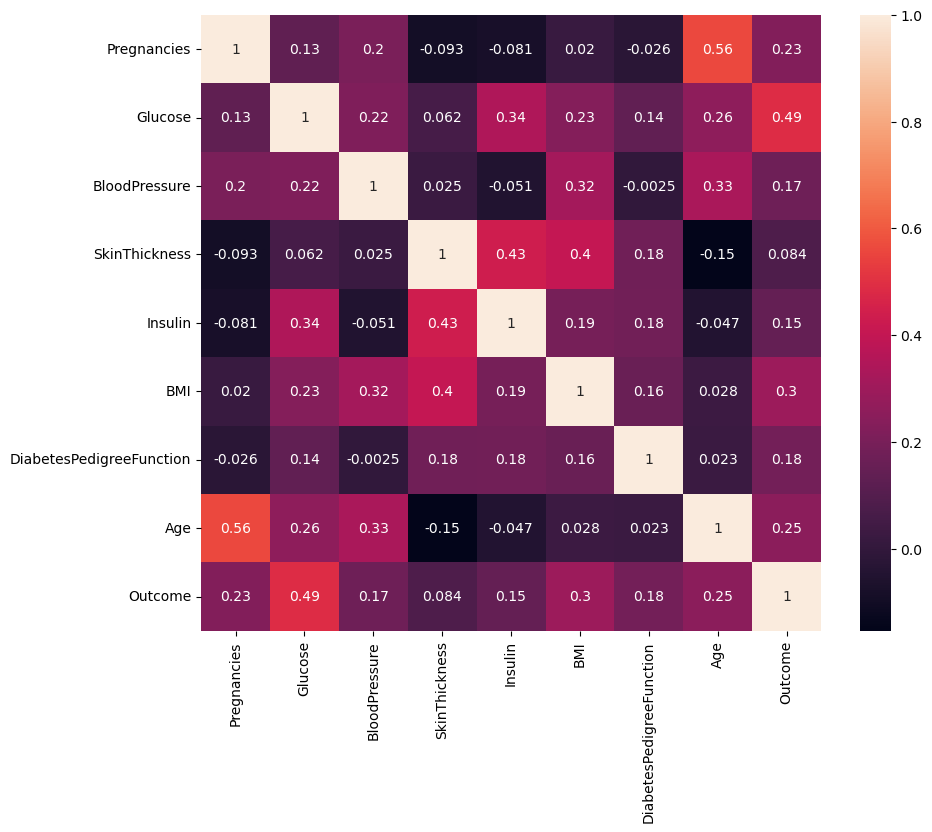

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True);

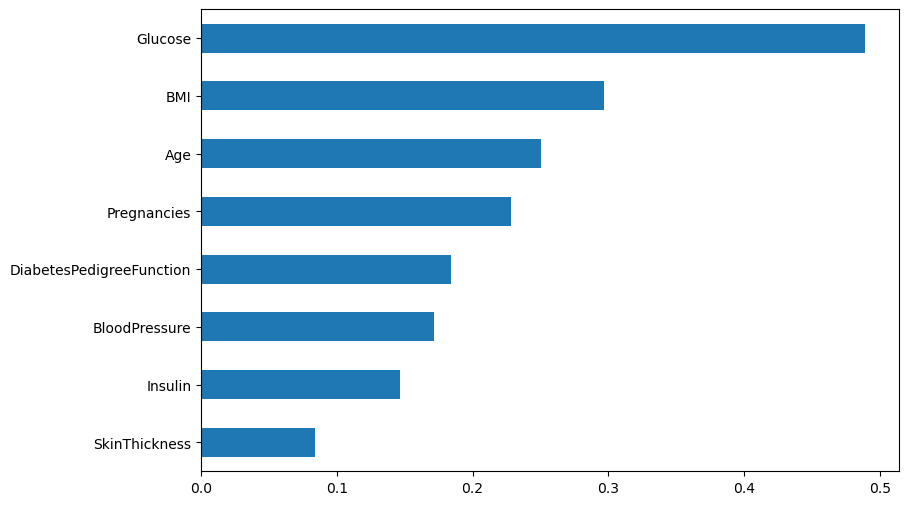

In [31]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

In [ ]:
sns.pairplot(df, hue = "Outcome");

# Train|Test Split

In [ ]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state = 42)

# stratify=y: bu datanın unbalanced olduğu için train ve test datasını eşit olarak dağılım uygulayarak işlem yapar

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [ ]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

# Model Performance on Classification Tasks

**Doğruluk (Accuracy)**

* **Ne Zaman Kullanılır:** Dengeli veri setlerinde, yani her sınıfın yaklaşık eşit sayıda örneğe sahip olduğu durumlarda kullanılır.
* **Açıklama:** Doğruluk, modelin toplam tahminlerinin ne kadarının doğru olduğunu gösterir. Ancak, dengesiz veri setlerinde yanıltıcı olabilir çünkü model sadece çoğunluk sınıfını doğru tahmin ederek yüksek doğruluk elde edebilir.

**Hassasiyet (Precision) ve Duyarlılık (Recall)**

* **Ne Zaman Kullanılır:** Özellikle bir sınıfın (genellikle pozitif sınıf) doğru tahmin edilmesinin önemli olduğu durumlarda kullanılır.
* **Açıklama:** Hassasiyet, pozitif olarak tahmin edilenler arasında gerçekten pozitif olanların oranını; duyarlılık ise gerçekten pozitif olan örneklerin doğru tahmin edilme oranını gösterir.

**F1 Skoru**

* **Ne Zaman Kullanılır:** Hassasiyet ve duyarlılığın her ikisinin de önemli olduğu durumlarda, özellikle dengesiz veri setlerinde kullanılır.
* **Açıklama:** F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır ve her iki metriği dengeler. Dengesiz veri setlerinde, azınlık sınıfının göz ardı edilmesini önlemek için kullanılır.

**Macro Average (Makro Ortalama)**

* **Ne Zaman Kullanılır:** Dengesiz veri setlerinde, her sınıfın eşit derecede önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metriklerin (örneğin, F1 skoru) basit aritmetik ortalaması alınır. Her sınıf eşit ağırlıkta değerlendirilir, böylece azınlık sınıflarının performansı da dikkate alınır.

**Weighted Average (Ağırlıklı Ortalama)**

* **Ne Zaman Kullanılır:** Her sınıfın veri setindeki temsili oranına göre ağırlıklandırılmasının önemli olduğu durumlarda kullanılır.
* **Açıklama:** Her sınıf için hesaplanan metrikler, o sınıfın veri setindeki oranına göre ağırlıklandırılır. Bu, çoğunluk sınıfının model performansı üzerinde daha büyük etkiye sahip olmasını sağlar.

Her bir metrik, modelin farklı yönlerini vurgular ve hangi metriğin kullanılacağı, problemin doğası ve özel ihtiyaçlarınıza bağlıdır. Özellikle dengesiz veri setlerinde, modelin her sınıf üzerindeki performansını anlamak için birden fazla metriği kullanmak ve karşılaştırmak yararlı olabilir.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------------------")
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)